In [1]:
import heron
from heron.likelihood import TimeDomainLikelihood, TimeDomainLikelihoodModelUncertainty
from heron.models.testing import SineGaussianWaveform, FlatPSD
from heron.detector import AdvancedLIGOHanford, AdvancedLIGOLivingston

/home/daniel/repositories/ligo/heron/heron/models/__init__.py:3: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import antenna, MSUN_SI


In [2]:
test_waveform = SineGaussianWaveform()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import coordinates as coords
import astropy.units as u

In [4]:
data = test_waveform.time_domain(
    {"width": 0.05}
)

/home/daniel/miniconda3/envs/heron/lib/python3.13/site-packages/gwpy/types/series.py:131: UserWarning: xindex was given to TimeSeries(), x0 will be ignored
  warn("xindex was given to %s(), x0 will be ignored"


In [5]:
location = coords.SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

In [6]:
position = {"ra": float(location.ra.to(u.radian).value),
            "dec": float(location.dec.to(u.radian).value),
            "psi": 0,
            "iota": 0,
            "phi_0": 0
}

In [7]:
injection = data.project(detector=AdvancedLIGOHanford(), **position)

In [8]:
likelihood = TimeDomainLikelihood(data=injection,
                                  psd=FlatPSD(),
                                  detector=AdvancedLIGOHanford(),
                                  waveform=SineGaussianWaveform(),
)                                  

In [9]:
widths = np.linspace(0.01, 0.1, 100)
likelihoods = []
for w in widths:
    position.update({"width": w, "theta_jn": 1, "phase": 0})
    likelihoods.append(likelihood(position))

The following keys were not recognised {'iota', 'phi_0'}


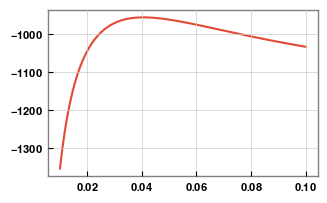

In [10]:
plt.plot(widths, likelihoods)